In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


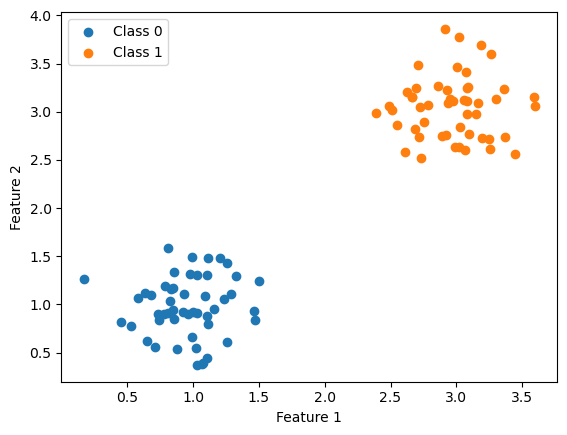

In [2]:
np.random.seed(42)

# Class 0
X0 = np.random.multivariate_normal([1, 1], [[0.1, 0], [0, 0.1]], 50)
y0 = np.zeros(len(X0))

# Class 1
X1 = np.random.multivariate_normal([3, 3], [[0.1, 0], [0, 0.1]], 50)
y1 = np.ones(len(X1))

X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

plt.scatter(X0[:, 0], X0[:, 1], label='Class 0')
plt.scatter(X1[:, 0], X1[:, 1], label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [3]:
#normalize  to the range [0, 1]
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_norm = (X - X_min) / (X_max - X_min)

X_norm = np.array(X_norm, requires_grad=False)
y = np.array(y, requires_grad=False)


In [4]:
#number of qubits (decision nodes)
n_qubits = 2
dev = qml.device('default.qubit', wires=n_qubits, shots=1)


In [5]:
@qml.qnode(dev)
def decision_tree_circuit(x, params):
    qml.RX(np.pi * x[0], wires=0) 
    qml.RX(np.pi * x[1], wires=1) 

    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)

    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))


In [6]:
def quantum_decision_tree_predict(x, params):
    outcome = decision_tree_circuit(x, params)

    if outcome[0] == -1:
        return 0  # Class 0
    else:
        return 1  # Class 1


In [7]:
def cost(params, X, y):
    predictions = [quantum_decision_tree_predict(x, params) for x in X]
    predictions = np.array(predictions)
    loss = np.mean((predictions - y) ** 2)
    return loss


In [8]:
np.random.seed(42)
params = np.random.uniform(0, 2 * np.pi, size=(2,), requires_grad=True)


In [9]:
opt = qml.AdamOptimizer(stepsize=0.1)


In [10]:
epochs = 20

for epoch in range(epochs):
    params, loss = opt.step_and_cost(lambda p: cost(p, X_norm, y), params)
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Epoch 0, Loss: 0.2900


C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Epoch 5, Loss: 0.1900


C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Epoch 10, Loss: 0.2100


C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of i

Epoch 15, Loss: 0.2300


C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")
C:\Users\Durga\anaconda3\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


In [11]:
predictions = [quantum_decision_tree_predict(x, params) for x in X_norm]
predictions = np.array(predictions)

#  accuracy
accuracy = np.mean(predictions == y)
print(f"\nModel accuracy: {accuracy:.2f}")



Model accuracy: 0.75


In [28]:
import pennylane as qml
from pennylane import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [29]:
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')


In [30]:
fraud_data = data[data['isFraud'] == 1]
non_fraud_data = data[data['isFraud'] == 0]

non_fraud_sample = non_fraud_data.sample(n=len(fraud_data) * 2, random_state=42)

data_balanced = pd.concat([fraud_data, non_fraud_sample])


In [31]:
data_balanced = data_balanced.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)


In [32]:
type_encoder = OneHotEncoder(sparse_output=False)
type_encoded = type_encoder.fit_transform(data_balanced[['type']])

features = np.hstack((
    data_balanced[['amount','isFlaggedFraud']].values,
    type_encoded
))
labels = data_balanced['isFraud'].values.astype(float)


In [33]:
scaler = StandardScaler()
features[:, 0:1] = scaler.fit_transform(features[:, 0:1])


In [34]:
features = np.array(features, requires_grad=False)
labels = np.array(labels, requires_grad=False)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


In [36]:
X_train_reduced = X_train[:, [0, 1]]
X_test_reduced = X_test[:, [0, 1]]


In [37]:
n_qubits = 2
dev = qml.device('default.qubit', wires=n_qubits, shots=1)


In [45]:
@qml.qnode(dev)
def decision_tree_circuit(x, params):
    # Feature encoding
    qml.RX(np.pi * x[0], wires=0) 
    qml.RX(np.pi * x[1], wires=1)  

    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)


    return qml.expval(qml.PauliZ(0))


In [46]:
def quantum_decision_tree_predict(x, params):
    expectation = decision_tree_circuit(x, params)

    probability = (expectation + 1) / 2

    return 1 if probability >= 0.5 else 0


In [47]:
def cost(params, X, y):
    expectations = [decision_tree_circuit(x, params) for x in X]
    expectations = np.array(expectations)
    probabilities = (expectations + 1) / 2 
    loss = -np.mean(y * np.log(probabilities + 1e-6) + (1 - y) * np.log(1 - probabilities + 1e-6))
    return loss


In [48]:
np.random.seed(42)
params = np.random.uniform(0, 2 * np.pi, size=(2,), requires_grad=True)


In [51]:
opt = qml.AdamOptimizer(stepsize=0.01)


In [52]:
epochs = 50

for epoch in range(epochs):
    params, loss = opt.step_and_cost(lambda p: cost(p, X_train_reduced, y_train), params)
    print(f"Epoch {epoch}, Loss: {loss:.4f}")
#     if epoch % 10 == 0:
        


Epoch 0, Loss: 6.1704
Epoch 1, Loss: 6.1536
Epoch 2, Loss: 6.1856
Epoch 3, Loss: 6.1640
Epoch 4, Loss: 6.2761


KeyboardInterrupt: 

In [ ]:

expectations = [decision_tree_circuit(x, params) for x in X_test_reduced]
expectations = np.array(expectations)
probabilities = (expectations + 1) / 2  # Scale to [0, 1]
predictions = (probabilities >= 0.5).astype(int)

accuracy = accuracy_score(y_test, predictions)
print(f"\nTest set accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)